In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("student scores.csv")
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [4]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


# Check for Duplicates

In [7]:
df.duplicated().sum()

0

# Checking for null Value

In [9]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# Imputing Null Values by filling the null values with most frequent values

In [11]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
null_val = df.isna().sum().sum()

if null_val > 0:
    print('Try imputing again, there are {} null values remaining in the dataset'.format(null_val))
else:
    print('Congratulations! You have successfully imputed all the null values in the dataset.')

Congratulations! You have successfully imputed all the null values in the dataset.


# Drop Unnamed Columns

In [14]:
df = df.drop("Unnamed: 0", axis = 1)
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female     group C   bachelor's degree      standard     none   
1  female     group C        some college      standard     none   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0     school_bus   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0     school_bus   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


# Changing Data Type

In [17]:
df['NrSiblings'] = df["NrSiblings"].astype(pd.Int64Dtype())
df["NrSiblings"].dtypes

Int64Dtype()

# Replacing wrong data

In [16]:
df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("05-Oct","5-10")
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3,school_bus,< 5,71,71,74
1,female,group C,some college,standard,none,married,sometimes,yes,0,school_bus,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1,school_bus,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0,school_bus,5 - 10,76,78,75


# Gender Distribution

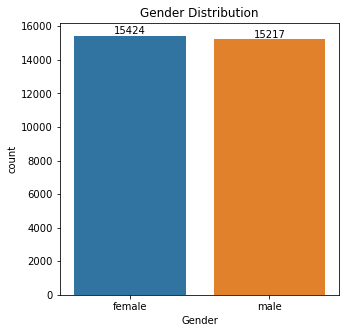

In [18]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data=df, x="Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

# Student Scores by Gender

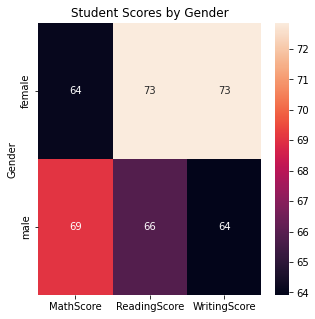

In [19]:
gen = df.groupby("Gender").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
plt.figure(figsize=(5,5))
sns.heatmap(gen, annot=True)
plt.title("Student Scores by Gender")
plt.show()

# Relationship between Parent's Education & Student's Score

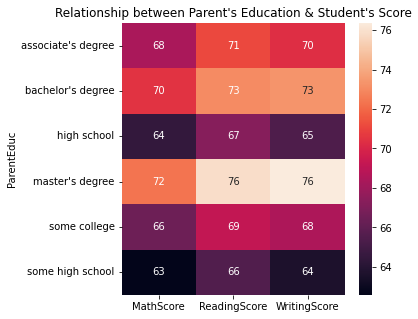

In [21]:
gb = df.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
plt.figure(figsize=(5,5))
sns.heatmap(gb, annot=True)
plt.title("Relationship between Parent's Education & Student's Score")
plt.show()

# Parents Educational Background

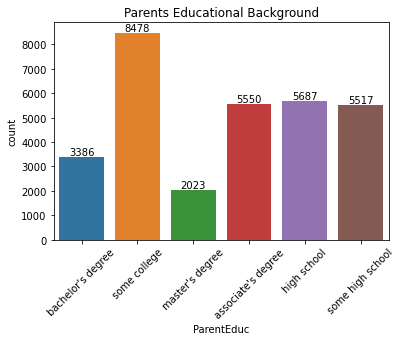

In [20]:
ax = sns.countplot(data= df, x="ParentEduc")
plt.title("Parents Educational Background")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.show()

# Impact of Parent Marital Status on Student Score

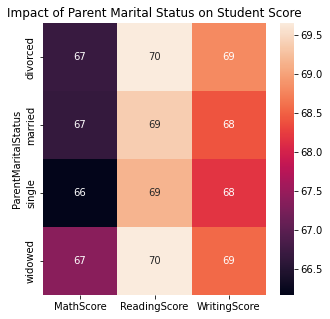

In [23]:
ms = df.groupby("ParentMaritalStatus").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
plt.figure(figsize=(5,5))
sns.heatmap(ms, annot=True)
plt.title("Impact of Parent Marital Status on Student Score")
plt.show()

# Parents Marital Status

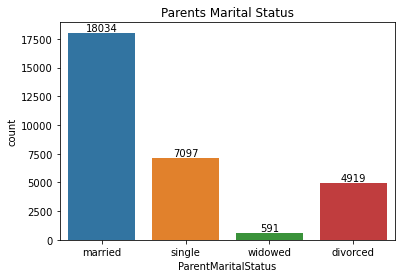

In [22]:
ax = sns.countplot(data = df, x = "ParentMaritalStatus", order = ["married","single","widowed","divorced"])
plt.title("Parents Marital Status")
ax.bar_label(ax.containers[0])
plt.show()

# Number of Siblings

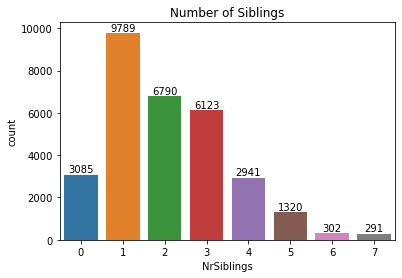

In [36]:
ax = sns.countplot(data=df, x="NrSiblings", order=[0,1,2,3,4,5,6,7])
ax.bar_label(ax.containers[0])
plt.title("Number of Siblings")
plt.show()

# Impact of No. of Siblings on Student Scores

In [37]:
df.groupby("NrSiblings").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"}).style.background_gradient(cmap='Reds')

,MathScore,ReadingScore,WritingScore
NrSiblings,,,
0,66.819449,69.547812,68.746515
1,66.450710,69.253346,68.220554
2,66.554934,69.472018,68.522533
3,66.719092,69.488159,68.650498
4,66.245495,69.144169,68.073444
5,66.630303,69.453788,68.282576
6,65.917219,68.801325,67.860927
7,67.615120,69.828179,68.986254


# Impact of Study Hours, Sports & Gender  on Scores

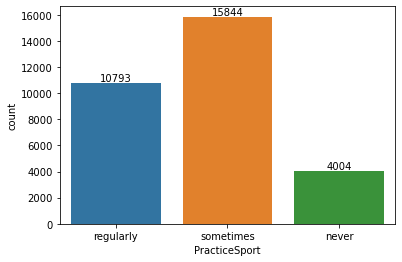

In [32]:
ax = sns.countplot(data=df,x="PracticeSport")
ax.bar_label(ax.containers[0])
plt.show()

In [33]:
df.groupby("PracticeSport").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"}).style.background_gradient(cmap="Purples")

,MathScore,ReadingScore,WritingScore
PracticeSport,,,
never,64.171079,68.337662,66.522727
regularly,67.839155,69.943019,69.604003
sometimes,66.289258,69.255112,68.090255


In [34]:
df.groupby(["PracticeSport","Gender"]).agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"}).style.background_gradient(cmap="Purples")

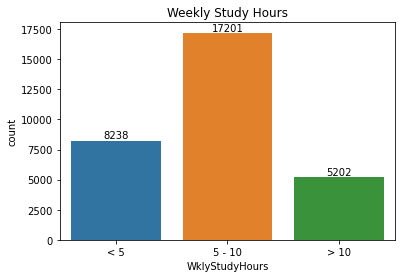

In [28]:
ax = sns.countplot(data = df, x = "WklyStudyHours")
ax.bar_label(ax.containers[0])
plt.title("Weekly Study Hours")
plt.show()

In [29]:
df.groupby(["WklyStudyHours","Gender"]).agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"}).style.background_gradient(cmap="Purples")

# Impact of Test Preparation on Score

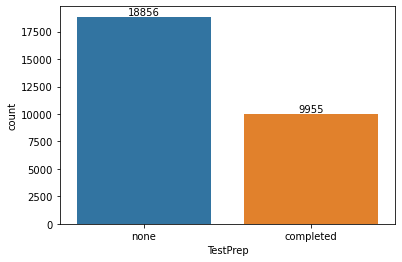

In [43]:
tp=sns.countplot(data=df, x="TestPrep")
tp.bar_label(tp.containers[0])
plt.show()

In [30]:
df.groupby("TestPrep").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"}).style.background_gradient(cmap="Blues")

,MathScore,ReadingScore,WritingScore
TestPrep,,,
completed,69.546660,73.732998,74.703265
none,65.120323,67.281495,65.394180


In [31]:
df.groupby(["Gender","TestPrep"]).agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"}).style.background_gradient(cmap="Blues")

# Impact of Lunch Type on Scores (If any)

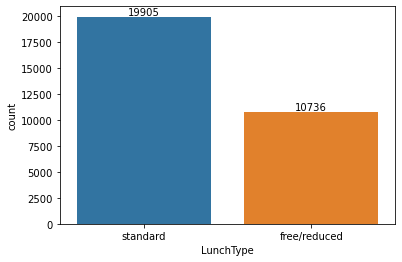

In [24]:
lt=sns.countplot(data=df, x="LunchType")
lt.bar_label(lt.containers[0])
plt.show()

In [25]:
df.groupby("LunchType").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"}).style.background_gradient(cmap="Greens")

,MathScore,ReadingScore,WritingScore
LunchType,,,
free/reduced,58.862332,64.189735,62.650522
standard,70.709370,72.175634,71.529716
